# Machine Learning using Logistic Regression

I will be using the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic) to try out Logistic Regression and predict whether a passenger survived or died.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
train = pd.read_csv('titanic_train.csv')

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

There seems to be some missing data from this dataset, so we can use heatmap to get a better understanding of what is missing.

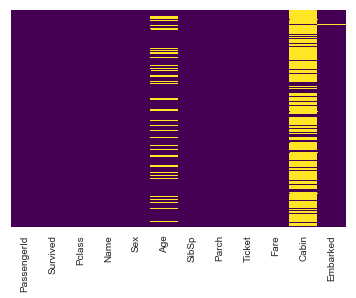

In [82]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

From the heatmap above, we can see that some of the Age and a lot of the Cabin data is missing. I think it is best to delete the 'Cabin' column whereas something can probably be done with the 'Age' column. 

In [83]:
sns.set_style('whitegrid')

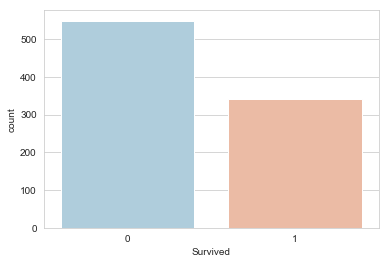

In [84]:
#Visualize the number of people who survived and who didn't. 0 = No, 1 = Yes
sns.countplot(x='Survived',data=train,palette='RdBu_r')

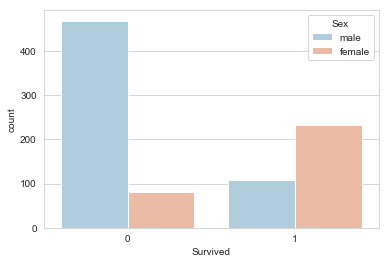

In [85]:
sns.countplot(data=train, x='Survived', hue='Sex', palette='RdBu_r')

The two count plots above shows us that more people died than survived and that most of them were male. This makes sense because they would've led women and children to safety first and most of the passengers were probably single men looking for work.

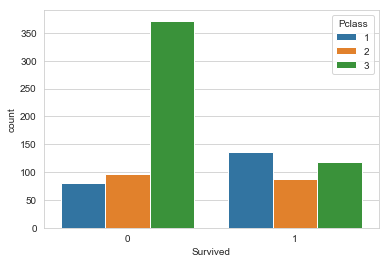

In [86]:
sns.countplot(data=train, x='Survived', hue='Pclass')

The above plot shows us that the higher class of ticket a passenger purchased, the higher the liklihood that they survived. This makes sense because the people on the Titanic might have helped passengers who had more money first.

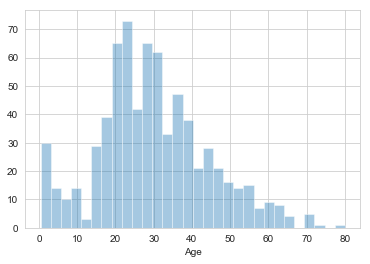

In [87]:
sns.distplot(train['Age'].dropna(),kde=False, bins=30) #dropna() removes any rows that have a NaN value

The plot above shows us that most of the passengers were between the ages of 20 to 30. This matches our previous understanding that most of the passengers were younger men.

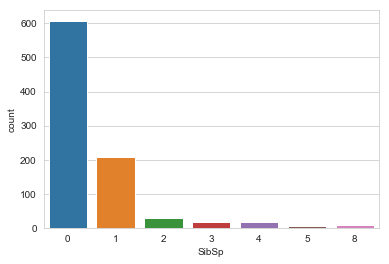

In [88]:
sns.countplot(x='SibSp', data=train)

The plot above shows us that most passengers had no siblings/spouses with them. This matches our previous understanding that most of the passengers were younger single men. 

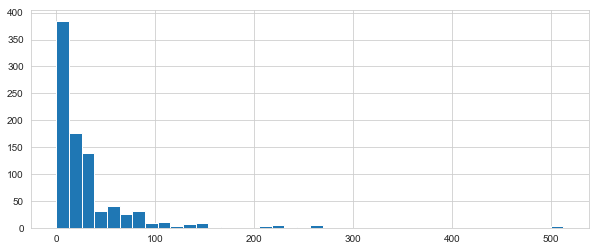

In [89]:
train['Fare'].hist(bins=40, figsize=(10,4))

The plot above shows us that most passengers bought their ticket for cheap.

## Cleaning the Data 

The age information is pretty important so I will try to fill it in with the average age by passenger class:

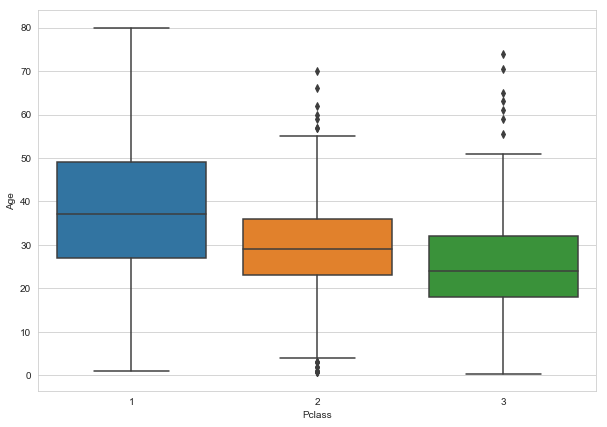

In [90]:
#A boxplot will help us determine the average age of the passengers in each class.
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

The boxplot above shows us that the passengers who were in the higher classes tend to be older. This makes sense as the older you are, the more money you will have. 
From the boxplot, the average ages are:
* Class 1: 37
* Class 2: 29
* Class 3: 24

Now I will use those average ages for the missing age data based on their Pclass:

In [91]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [92]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis =1)

Lets look at the heatmap now.

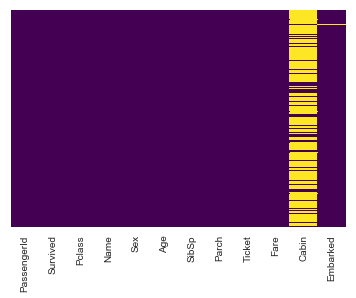

In [93]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Ok so all the 'Age' values are now filled. Now I will drop the entire 'Cabin' column and the NaN value under 'Embarked'.

In [94]:
train.drop('Cabin', axis=1, inplace=True)

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


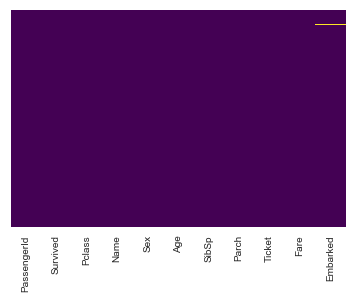

In [96]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [97]:
#train.dropna(axis=1, inplace=True)  this will drop a whole column that has a null value
train.dropna(inplace=True)  # this will drop a row with a null value
#if you have inplace=True, then it will permanently delete that row/column

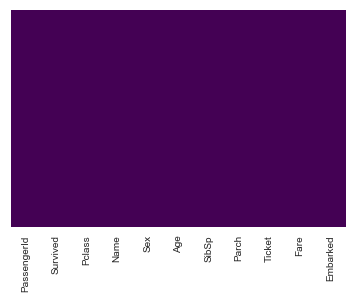

In [98]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Separating Categories 

We have to separate the columns that has a string value into a dummy variable so that our model will be able to read it. I will do this for the 'Sex' and 'Embarked' columns.

In [99]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [101]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


Since we know one column will automatically let us know the other, then we will use 'drop_first=True' so we only use one of the columns or else our ML model may get confused.

In [102]:
#I will do the same thing to the 'Embarked' column.
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [103]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [104]:
#Concatenate the new columns with 'train'
train = pd.concat([train, sex, embark], axis=1)

In [105]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [106]:
#I will drop the columns that I will not use for the model.
train.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model 

## Train Test Split
I will now split the data into a training set and test set. Kaggle also provided a test.csv file that you can potentially use as more training data.

In [108]:
#drop PassengerID column because it is not really useful to us since it is just numbers going one by one
train.drop(['PassengerId'], axis=1, inplace=True)

In [109]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [110]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [111]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [112]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

## Training and Predicting 

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
#create an instance of a logistic regression model
logmodel = LogisticRegression()

In [117]:
logmodel.fit(X_train, y_train)

C:\Users\Oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
predictions = logmodel.predict(X_test)

## Evaluation 

We can evaluate using precision, recall, f1-score using classification report.

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



The classification report show that the predictions I got are at about 80% which is not too bad! 

Another way to evaluate is using confusion matrix:

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)